# Business Understanding

## Project Domain

Domain: Agriculture & Precision Farming
Sub-Domain: Smart Farming & Decision Support Systems

Sistem rekomendasi tanaman (Crop Recommendation System) termasuk dalam bidang pertanian presisi (precision agriculture) yang memanfaatkan data science dan machine learning untuk membantu petani memilih tanaman yang paling sesuai berdasarkan kondisi tanah dan iklim.

## Problem Statements

Masalah yang Dihadapi:
1. Ketidaktepatan Pemilihan Tanaman
  * Petani sering memilih tanaman berdasarkan pengalaman tradisional tanpa mempertimbangkan data ilmiah tentang kondisi tanah dan iklim.
  * Hal ini dapat menyebabkan hasil panen tidak optimal atau bahkan gagal.

2. Ketergantungan pada Ahli Pertanian
  * Konsultasi dengan ahli agronomi membutuhkan biaya dan waktu yang tidak selalu terjangkau oleh petani kecil.

3. Perubahan Iklim yang Tidak Terduga
  * Perubahan cuaca ekstrem memengaruhi produktivitas tanaman, sehingga diperlukan prediksi berbasis data.
4. Pemanfaatan Lahan yang Tidak Optimal
  * Tanah dengan kandungan nutrisi berbeda membutuhkan tanaman yang berbeda, tetapi petani sering menanam satu jenis tanaman secara terus-menerus, menyebabkan degradasi tanah.

## Goals

Membangun sistem berbasis AI (Artificial Neural Network) yang dapat merekomendasikan tanaman terbaik berdasarkan parameter:
1. Kondisi Tanah (Nitrogen, Phosphorus, Potassium, pH)
2. Kondisi Iklim (Suhu, Kelembaban, Curah Hujan)

## Solustion Statements

* Machine Learning Model
Menggunakan Artificial Neural Network (ANN) untuk klasifikasi tanaman berdasarkan dataset parameter tanah dan iklim.
Model dilatih untuk memprediksi tanaman dengan akurasi tinggi (>90%).

* Aplikasi Web (Streamlit)
Membuat antarmuka yang mudah digunakan bagi petani untuk memasukkan parameter tanah dan mendapatkan rekomendasi instan.

* Optimasi dengan TensorFlow Lite
Model dikonversi ke format TFLite agar ringan dan bisa dijalankan di perangkat dengan sumber daya terbatas.

# Data Understanding

## Import Data dari Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"teguhberkata","key":"19c7b7655df10e8315baf9879851bbb2"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d atharvaingle/crop-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset
License(s): apache-2.0
crop-recommendation-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!mkdir crop-recommendation-dataset
!unzip crop-recommendation-dataset.zip -d crop-recommendation-dataset
!ls crop-recommendation-dataset

mkdir: cannot create directory ‘crop-recommendation-dataset’: File exists
Archive:  crop-recommendation-dataset.zip
replace crop-recommendation-dataset/Crop_recommendation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: crop-recommendation-dataset/Crop_recommendation.csv  
Crop_recommendation.csv


## Import Library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

## Exploratory Data Analysis

In [ ]:
df = pd.read_csv('/content/crop-recommendation-dataset.zip')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# Data Preparation

In [ ]:
# pisahkan fitur dan target
X = df.drop(columns=["label"])
y = df["label"]

In [ ]:
# Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
# Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y_encoded, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Modeling

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(le.classes_), activation="softmax")
])

In [ ]:
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 22)             │           726 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,086 (47.21 KB)

 Trainable params: 12,086 (47.21 KB)

 Non-trainable params: 0 (0.00 B)

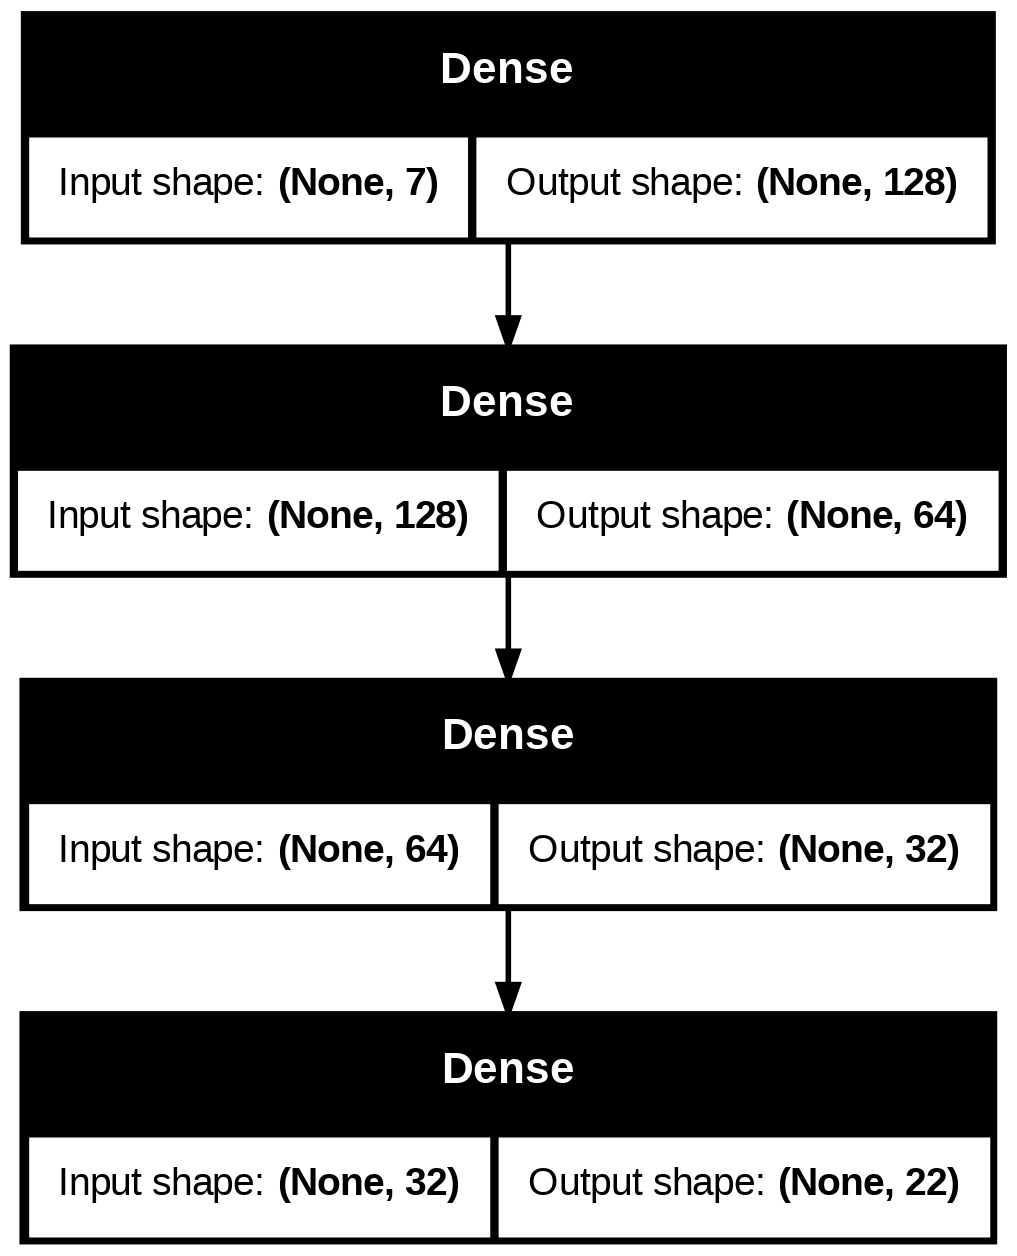

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [ ]:
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=16,
                    validation_data=(X_test, y_test))

Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1083 - loss: 2.9973 - val_accuracy: 0.3091 - val_loss: 2.2959
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4336 - loss: 1.8761 - val_accuracy: 0.7045 - val_loss: 1.1342
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7365 - loss: 0.9275 - val_accuracy: 0.7705 - val_loss: 0.7444
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8583 - loss: 0.5989 - val_accuracy: 0.8250 - val_loss: 0.5750
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8691 - loss: 0.4574 - val_accuracy: 0.8523 - val_loss: 0.4873
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9020 - loss: 0.3813 - val_accuracy: 0.8614 - val_loss: 0.4003
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9147 - loss: 0.2971 - val_accuracy: 0.8659 - val_loss: 0.3715
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9403 - loss: 0.2467 - val_accuracy: 0.

# Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9665 - loss: 0.0905 
Akurasi Model: 0.9682
Loss Model: 0.0849


In [ ]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

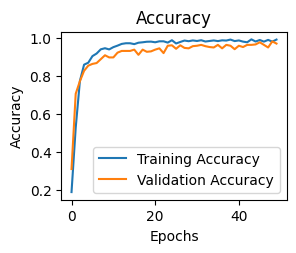

In [ ]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

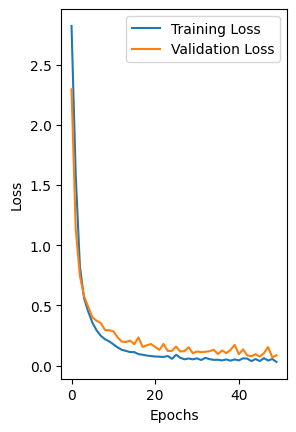

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


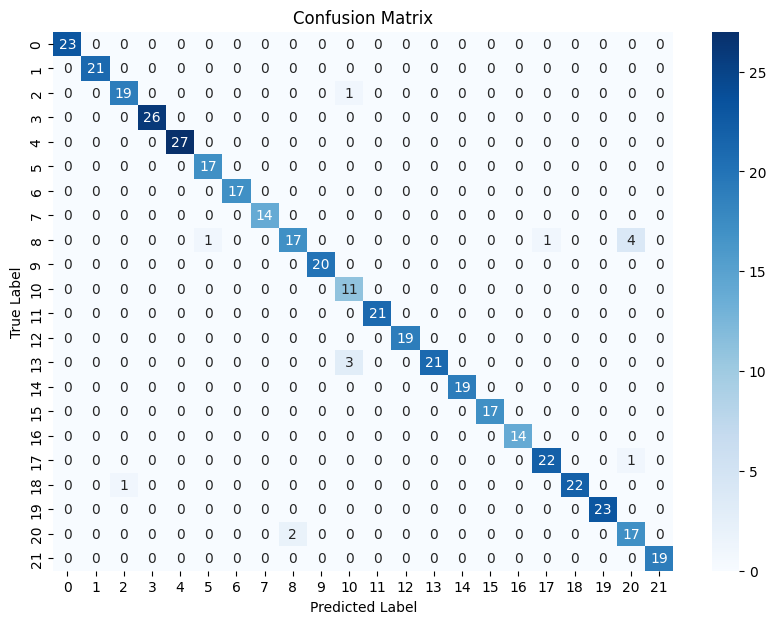

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.89      0.74      0.81        23
           9       1.00      1.00      1.00        20
          10       0.73      1.00      0.85        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
    

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

In [ ]:
sample_input = np.array([[78, 42 ,42, 20.13, 81.60,	7.62, 262.71]])
sample_input_df = pd.DataFrame(sample_input)

In [ ]:
sample_input_scaled = scaler.transform(sample_input_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
predicted_class = np.argmax(model.predict(sample_input_scaled))
predicted_crop = le.inverse_transform([predicted_class])

print(f"Tanaman yang direkomendasikan: {predicted_crop[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Tanaman yang direkomendasikan: rice


## Save Model

In [ ]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('crop_recommendation.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpn04d5rzd'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 7), dtype=tf.float32, name='keras_tensor_15')
Output Type:
  TensorSpec(shape=(None, 22), dtype=tf.float32, name=None)
Captures:
  136831120597904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136831120598480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136831120599248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136831120599632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136831120599824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136831120599056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136831120590800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136831111754384: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']